In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=['pregnancies', 'glucose', 'bloodPressure', 'skinThickness', 'insulin', 'bmi', 'diabetesPedigreeFunc', 'age'])

In [6]:
X.head()

,pregnancies,glucose,bloodPressure,skinThickness,insulin,bmi,diabetesPedigreeFunc,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [7]:
classifier = Sequential()
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=4, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

Metal device set to: Apple M1


2022-08-02 08:47:29.113958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-02 08:47:29.114231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs=100)

Epoch 1/100


2022-08-02 08:47:29.295983: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/39 [======>.......................] - ETA: 0s - loss: 0.7292 - accuracy: 0.5300 

2022-08-02 08:47:29.525888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 11ms/step - loss: 0.7423 - accuracy: 0.5455 - val_loss: 0.7001 - val_accuracy: 0.5497
Epoch 2/100
10/39 [======>.......................] - ETA: 0s - loss: 0.7307 - accuracy: 0.5600

2022-08-02 08:47:29.973038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 7ms/step - loss: 0.6997 - accuracy: 0.5896 - val_loss: 0.6679 - val_accuracy: 0.6073
Epoch 3/100
39/39 [==============================] - 0s 7ms/step - loss: 0.6681 - accuracy: 0.6286 - val_loss: 0.6429 - val_accuracy: 0.6492
Epoch 4/100
39/39 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.6442 - val_loss: 0.6224 - val_accuracy: 0.6545
Epoch 5/100
39/39 [==============================] - 0s 7ms/step - loss: 0.6155 - accuracy: 0.6545 - val_loss: 0.6029 - val_accuracy: 0.6754
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 0.5926 - accuracy: 0.6805 - val_loss: 0.5879 - val_accuracy: 0.6859
Epoch 7/100
39/39 [==============================] - 0s 7ms/step - loss: 0.5731 - accuracy: 0.6909 - val_loss: 0.5748 - val_accuracy: 0.6963
Epoch 8/100
39/39 [==============================] - 0s 7ms/step - loss: 0.5564 - accuracy: 0.6935 - val_loss: 0.5647 - val_accuracy: 0.7016
Epoch 9/100
39/39 [======

Epoch 60/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3893 - accuracy: 0.8312 - val_loss: 0.5416 - val_accuracy: 0.7539
Epoch 61/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3893 - accuracy: 0.8286 - val_loss: 0.5393 - val_accuracy: 0.7487
Epoch 62/100
39/39 [==============================] - 0s 6ms/step - loss: 0.3890 - accuracy: 0.8338 - val_loss: 0.5407 - val_accuracy: 0.7487
Epoch 63/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3881 - accuracy: 0.8312 - val_loss: 0.5430 - val_accuracy: 0.7539
Epoch 64/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3879 - accuracy: 0.8260 - val_loss: 0.5415 - val_accuracy: 0.7487
Epoch 65/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3871 - accuracy: 0.8312 - val_loss: 0.5418 - val_accuracy: 0.7539
Epoch 66/100
39/39 [==============================] - 0s 7ms/step - loss: 0.3864 - accuracy: 0.8312 - val_loss: 0.5416 - val_accuracy: 0.7539
Epoch 

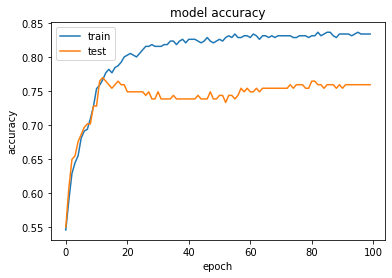

In [27]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [12]:
y_pred = classifier.predict(X_test)

6/6 [==============================] - 0s 2ms/step


2022-08-02 08:47:56.229806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
y_pred_1 = (y_pred >= 0.45)
y_pred_2 = (y_pred >= 0.55)
y_pred_3 = (y_pred >= 0.66)
y_pred_4 = (y_pred >= 0.77)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_1)
cm

array([[110,  21],
       [ 25,  36]])

In [26]:
score = accuracy_score(y_pred_1,y_test)
score

0.7604166666666666